# Exploratory Data Analysis on Udemy Courses

- This dataset was gotten from Kaggle. It contains 3678 records of Udemy courses from 4 subjects(Business Finance, Graphic Design, Musical Instruments and Web Design). Udemy, Inc. is a for-profit massive open online course (MOOC) provider aimed at professional adults and students.

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data set

In [3]:
pwd = os.getcwd()
data = pd.read_csv(pwd + '/udemy_courses.csv', parse_dates=['published_timestamp'])
data


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development


## Data Preparation and Cleaning
- Dropping the unwanted features in the dataframe
- Checking for null values
- Outlier detection
- Converting from numeric to datetime value

In [8]:
#check data types
data.dtypes


course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

### 0bservation - published time stamp is an object and not in the date time format. Went back up to parse that column as datetime

In [4]:
data.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [15]:
# make a copy of the data
data_copy = data.copy()

In [5]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [7]:
#Check the shape of my dataset
data.shape

(3678, 12)

- There are 3678 rows and 12 columns in this dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

- 6 columns are numeric data type, 5 columns are categorical data type, and 1 column contains boolean data.

In [10]:
#check for null values
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<AxesSubplot:>

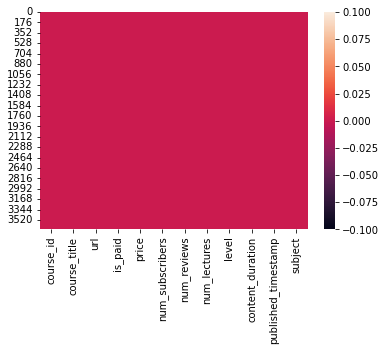

In [11]:
sns.heatmap(data.isnull())

### There are no null values but I wanted to plot this on a heat map :)

In [14]:
#check for duplicates
data.duplicated().any()

True

In [20]:
#drop duplicates
data = data.drop_duplicates()
data.duplicated().any()


False

## Descriptive Statistics

In [125]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,Year
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603,2015.431100
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830,1.184731
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000,2015.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000,2016.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000,2016.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000


- The highest price for a course is 200 and we have some free courses as well
- The maximum number of subscirbers is 268923
- The maximum number of lectures is 779
- The maximum content duration is 78.5

Does the max num of lectures mean that the course has the highest content duration?

In [126]:
data[data.num_lectures==779]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
2707,79154,Back to School Web Development and Programming...,https://www.udemy.com/back-to-school-web-devel...,True,200,18170,117,779,Beginner Level,44.5,2013-08-19 14:53:00+00:00,Web Development,2013


- The course that has the maximum number of lectures does not have maximum content duration


### Correlation Matrix

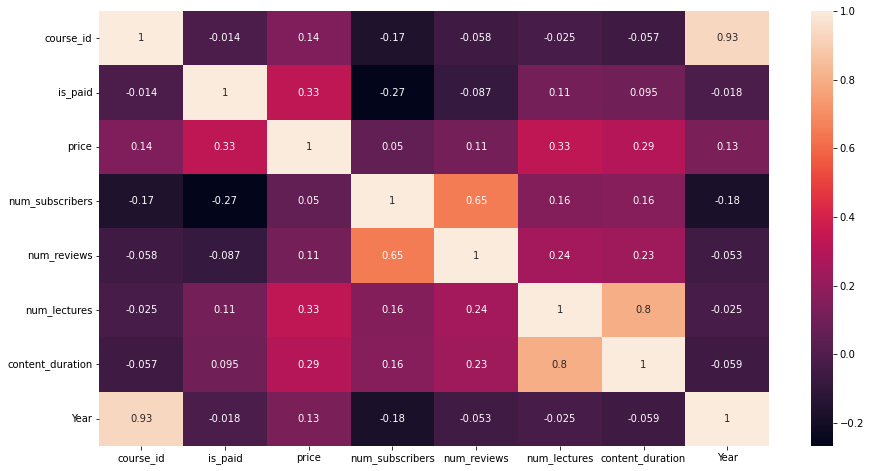

In [129]:

corrMatrix = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()


- The no. of subcribers is highly correlated with num of reviews and also the no. of lecture is correlated with content duration

## Exploring the Data

### How many courses are present for each subject?

In [21]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [104]:
#get the count
subject_count = data['subject'].value_counts()

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


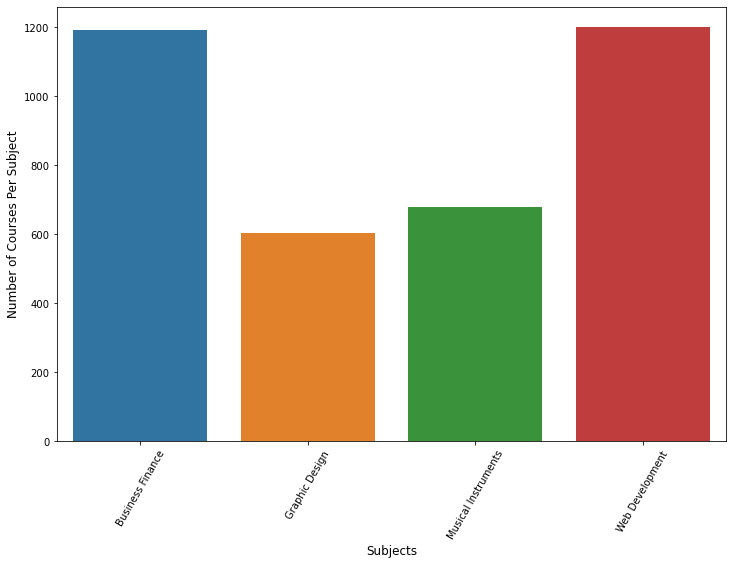

In [28]:
#lets visualize this
plt.figure(figsize=[12,8])
sns.countplot(data.subject)
plt.xlabel('Subjects', fontsize =12)
plt.ylabel('Number of Courses Per Subject', fontsize =12)
plt.xticks(rotation=60)
plt.show()

### Business finance has the most most number of courses followed by Web development.

## What are the levels of difficulties for the courses?

In [113]:
# count of difficulty level
level_count= data.level.value_counts()
level_count

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


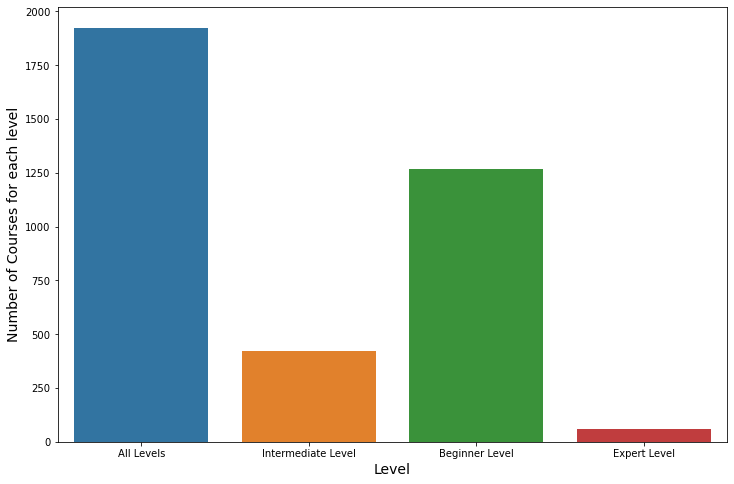

In [114]:
#lets visualize this with a countplot
plt.figure(figsize=[12,8])
sns.countplot(data.level)
plt.ylabel('Number of Courses for each level', fontsize= 14)
plt.xlabel('Level',fontsize =14)
plt.show()

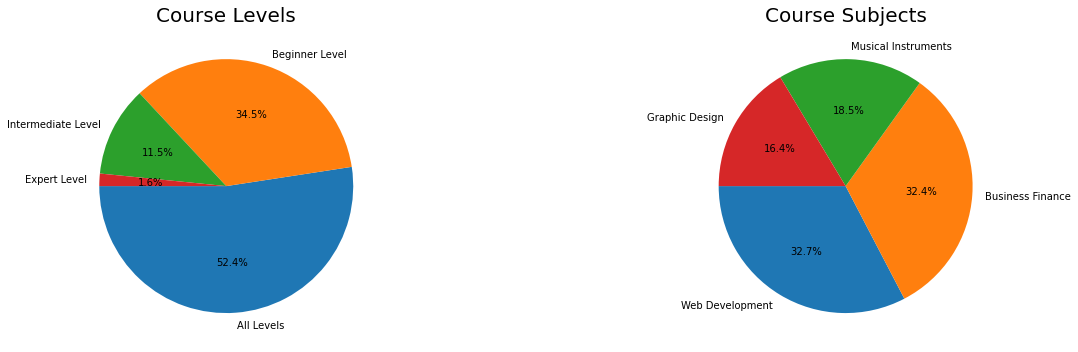

In [112]:
#pie chart showing percentages
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].pie(level_count, startangle=180, labels=level_count.index,autopct="%1.1f%%")
ax[0].set_title("Course Levels", size=20,color= "black")
ax[1].pie(subject_count, startangle=180, labels=subject_count.index, autopct="%1.1f%%")
ax[1].set_title("Course Subjects", size=20,color= "black")
fig.set_facecolor('white')
plt.tight_layout()
plt.show()

- Most of the courses are suitable for All levels, over 50%. This means that anybody can take the course
- Business finace and Web development are the the courses that have the most subjects under them

### How many courses are free or paid?

In [33]:
# count of free/paid courses
data.is_paid.value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


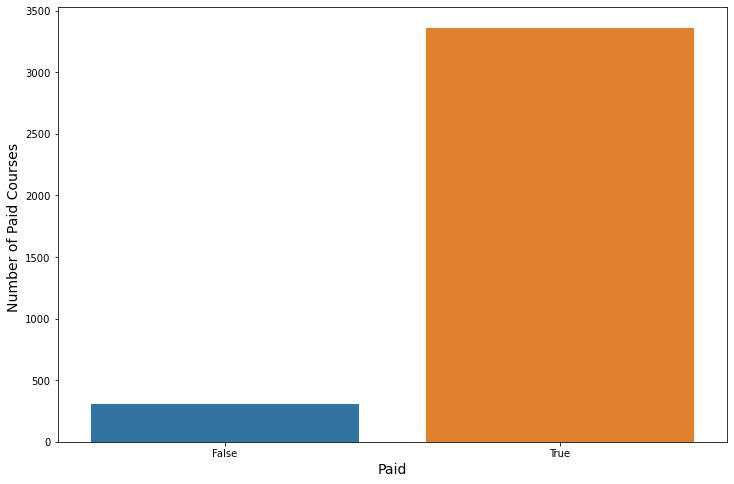

In [34]:
#visualize with a countplot
plt.figure(figsize=[12,8])
sns.countplot(data.is_paid)
plt.ylabel('Number of Paid Courses ', fontsize= 14)
plt.xlabel('Paid',fontsize =14)
plt.show()

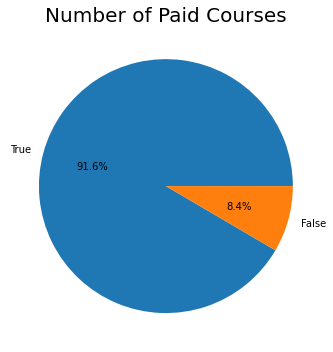

In [121]:
fig = plt.figure(figsize=(20,5))
plt.pie(data.is_paid.value_counts(), labels =data.is_paid.value_counts().index, autopct="%1.1f%%")
plt.title('Number of Paid Courses', size = 20, color ='black')
fig.set_facecolor('white')
plt.tight_layout()
plt.show()

- Over 91% of the courses are paid which is expected since they are all hosted on udemy. It will also be interesting to find out if paid or free courses have more lectures and more subscribers.

In [36]:
#which course has more lectures? free or paid?
data.groupby(['is_paid']).mean()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


### How do the number of subscribers vary with paid courses?

<AxesSubplot:xlabel='is_paid', ylabel='num_subscribers'>

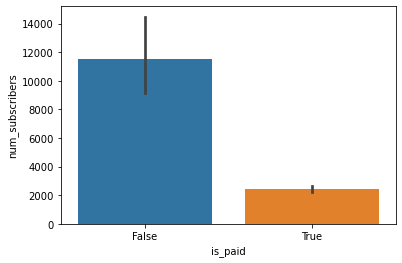

In [38]:
# visualize with a bar plot
sns.barplot(x = 'is_paid', y = 'num_subscribers', data=data)

- Free courses have a higher number of subscribers than paid courses. This isn't surprising because free courses mean that more people can enroll and learn hence why more students prefer them

(array([0, 1, 2, 3]),
 [Text(0, 0, 'All Levels'),
  Text(1, 0, 'Intermediate Level'),
  Text(2, 0, 'Beginner Level'),
  Text(3, 0, 'Expert Level')])

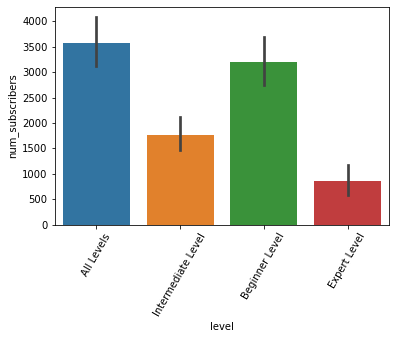

In [41]:
#Which level has the highest number of subscribers?
sns.barplot(x='level', y= 'num_subscribers', data= data)
plt.xticks(rotation = 60)

- All levels and beginner-level courses have more subscribers signifying that there are hardly any barriers or need for prior knowledge to enroll for these courses.

### What's the most popular course title?

In [57]:
#subset the data
data[data.num_subscribers.max()==data['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

### What are the 10 most popular courses titles based on the no. of subscribers?

In [61]:
top_courses=data.sort_values(by ='num_subscribers', ascending= False).head(10)
top_courses

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10 15:19:29+00:00,Web Development
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development


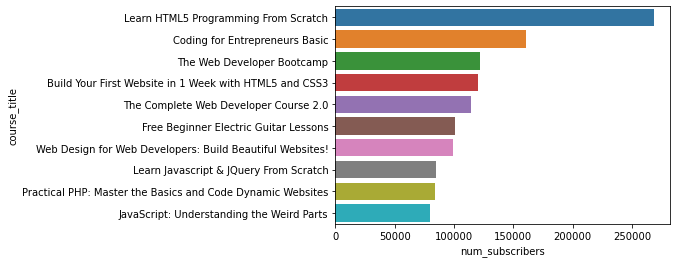

In [63]:
# lets visualize this with a barplot
sns.barplot(x='num_subscribers', y= 'course_title', data= top_courses)
plt.show()
#is the course witht the highest number of subs the most rated? lets find out

- 'Learn HTML5' programming is the most poplular course tile wih the highest number of subscribers. This means that a lot of the subscribers are interested in coding. I'm currently honing my python skills so it will be interesting to see how many course titles are related to python.

### No. of courses related to python

In [79]:
#no of courses related to python
len(data[data.course_title.str.contains('python', case = False)])

29

Out of 3672 courses, 29 are related to python

In [124]:
len(data.course_title)

3672

### What are the top 6 popular python courses?

In [85]:
#what are the top 6 popular python courses
top_python_courses=data[data.course_title.str.contains('python', case= False)].sort_values(by='num_subscribers', ascending= False).head(6)
top_python_courses


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development
2570,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45.0,2013-04-08 00:46:14+00:00,Web Development
2528,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5,2015-02-09 15:37:56+00:00,Web Development
3200,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5,2017-02-24 18:40:55+00:00,Web Development
3507,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2.0,2015-06-09 19:51:50+00:00,Web Development
2553,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11.0,2016-09-26 15:08:29+00:00,Web Development


<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

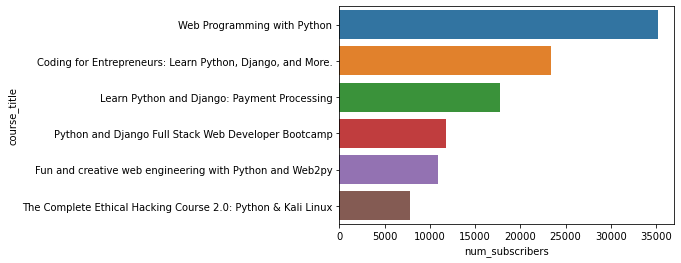

In [86]:
#visualize with a bar plot
sns.barplot(x = 'num_subscribers', y ='course_title', data=top_python_courses)

- Majoruty of the subscribers are interested in learning web programming with python

### Which of the courses are highly rated?

In [64]:
#find the columns i'm interested in
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [67]:
#courses with the highest number of reviews
top_rated=data.sort_values(by ='num_reviews', ascending= False).head(10)
top_rated

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11 07:29:29+00:00,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development
3254,705264,Modern React with Redux,https://www.udemy.com/react-redux/,True,180,50815,15117,150,All Levels,26.5,2015-12-28 19:20:21+00:00,Web Development
3246,289230,Learn and Understand AngularJS,https://www.udemy.com/learn-angularjs/,True,175,59361,11580,55,All Levels,7.0,2014-09-24 00:57:25+00:00,Web Development
3251,461160,Learn and Understand NodeJS,https://www.udemy.com/understand-nodejs/,True,195,58208,11123,98,All Levels,13.0,2015-08-31 21:07:48+00:00,Web Development
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development
3228,719002,Angular 2 with TypeScript for Beginners: The P...,https://www.udemy.com/angular-2-tutorial-for-b...,True,150,40070,8341,194,All Levels,9.5,2016-03-03 20:17:59+00:00,Web Development
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51+00:00,Musical Instruments


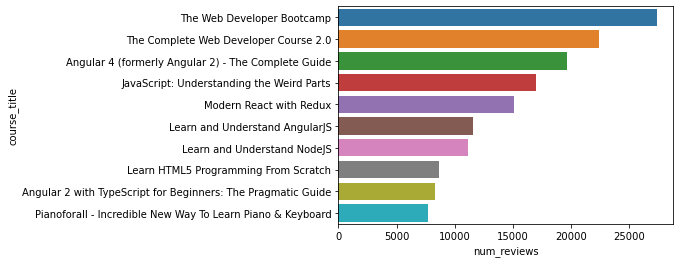

In [71]:
#visualize using a bar plot
sns.barplot(x='num_reviews', y= 'course_title', data= top_rated)
#sns.barplot(x='num_reviews', y= 'subject', data= top_rated)
plt.show()

- The web developer bootcamp has over 25k reviews followed by thw complete web developer course 2.0. It would have been interesting to get review rating data for the courses. This might be an indication that these courses are popular, especially now that more people are trying to pivot to a career in tech.

### Does price affect the number of reviews?

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

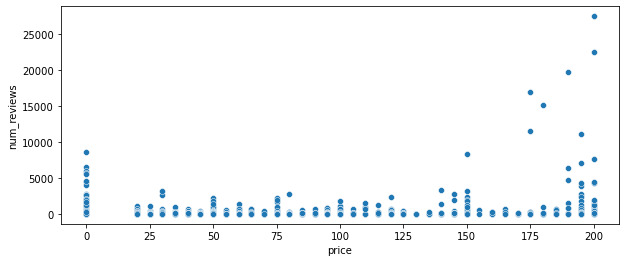

In [75]:
#visualize the relationship between price and number of reviews with a scatter plot
plt.figure(figsize=(10,4))
sns.scatterplot(x= 'price', y='num_reviews', data= data)


### Which year had the highest number of courses?

In [87]:
#columns
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [94]:
#extract the year from the date time column
data['Year'] =data.published_timestamp.dt.year
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017


/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

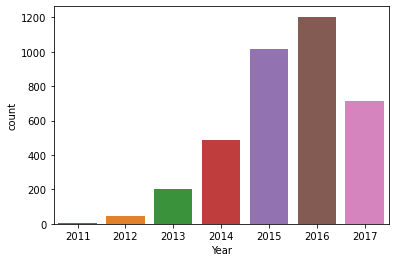

In [95]:
#visualize with a countplot
sns.countplot('Year', data = data)

- 2016 was the year with the highest number of courses published. It would be interesting to see which one of the courses got published more within each year

### Which courses subjects are published more within each year?

In [103]:
#display the categorywise of posted subjects year wise
data.groupby('Year')['subject'].value_counts()


Year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64

- In 2011 only Web Development courses were published


# Conclusions
- Business Finance and Web Developement have the highest number of course titles and also subscirbers
- There are no barriers for entry fro most of the courses as people at 'all levels' can take them.
- The Udemy courses provide both paid and unpaid courses. A high number of courses are paid with the highest being 200
- Courses that do not require payment have a higher number of subsctibers
- Web Programming with Python is the most popular python course
- Except for 2011 only having courses in Web developemnt, the rest of the years have 4 courses